In [1]:
#!python -m pip install mplfinance

In [2]:
import numpy as np 
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf

In [3]:
def save_to_csv_from_yahoo(ticker,syear,smonth,sday,eyear,emonth,eday):
    start = dt.datetime(syear,smonth,sday)
    end = dt.datetime(eyear,emonth,eday)
    
    df = web.DataReader(ticker,'yahoo',start,end)
    df.to_csv("C:\\Users\\nafissaad\\Finance\\"+ticker)
    return df

In [4]:
def get_df_from_csv(ticker):
    try:
        df=pd.read_csv('C:\\Users\\nafissaad\\Finance\\'+ticker)
    except FileNotFoundError:
        print('File doesnt exist')
    else:
        return df

In [5]:
#Daily Return to dataframe
def add_daily_return_to_df(df,ticker):
    df['daily_return']= (df['Adj Close']/df['Adj Close'].shift(1)) -1
    df.to_csv("C:\\Users\\nafissaad\\Finance\\python for finance")
    return df

In [6]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    daily_ret = df.loc[mask]['daily_return'].mean()
    df2 = df.loc[mask]
    days = df2.shape[0]
    return (days * daily_ret)

In [7]:
#Matplotlib Finanace
def mplfinanace_plot(ticker,chart_type,syear,smonth,sday,eyear,emonth,eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    try:
        df=pd.read_csv('C:\\Users\\nafissaad\\Finance\\'+ticker)
    except FileNotFoundError:
        print('File doesnt exist')
    else:
        df.index=pd.DatetimeIndex(df["Date"])
        df_sub=df.loc[start:end]
        mpf.plot(df_sub,type='candle')
        mpf.plot(df_sub,type='line')
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        s=mpf.make_mpf_style(base_mpf_style='charles',rc={'font.size': 8})
        fig=mpf.figure(figsize=(12,8),style=s)
        ax = fig.add_subplot(2,1,2)
        av=fig.add_subplot(2,1,2,sharex=ax)
        mpf.plot(df_sub,type=chart_type,mav=(3,5,7),ax=ax,volume=av,show_nontrading=True)
        

In [8]:
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv('C:\\Users\\nafissaad\\Finance\\'+ticker)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        df.index = pd.DatetimeIndex(df['Date'])
        s=mpf.make_mpf_style(base_mpf_style='charles',rc={'font.size': 8})
        df['Adj Close'].plot(figsize=(12,8),style=s)

In [9]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

In [10]:
def marge_df_by_column_name(col_name,syear, smonth, sday, eyear, emonth, eday,*tickes):
    mult_df = pd.DataFrame()
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    for x in tickers:
        mult_df[x] = web.DataReader(x,'yahoo',start,end)[col_name]
    return mult_df

In [11]:
#changing value of multiple stock
def plot_return_mult_stocks(investment,stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize=(15,6))

In [12]:
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [13]:
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        coefficient_of_varriance = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(coefficient_of_varriance))

In [14]:
AMZN1=save_to_csv_from_yahoo('AMZN',2020,1,1,2021,1,1)

In [15]:
AMZN=get_df_from_csv('AMZN')
AMZN

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966
1,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
3,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
4,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
...,...,...,...,...,...,...,...
249,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941
250,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961
251,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000
252,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098


In [16]:
add_daily_return_to_df(AMZN,'AMZN')

,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
0,2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966,NaN
1,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,0.027151
2,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-0.012139
3,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,0.014886
4,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,0.002092
...,...,...,...,...,...,...,...,...
249,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,-0.003949
250,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,0.035071
251,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,0.011584
252,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098,-0.010882


In [17]:
tot_ret = get_return_defined_time(AMZN,2020,1,1,2021,1,1)
tot_ret

0.6413534880927203

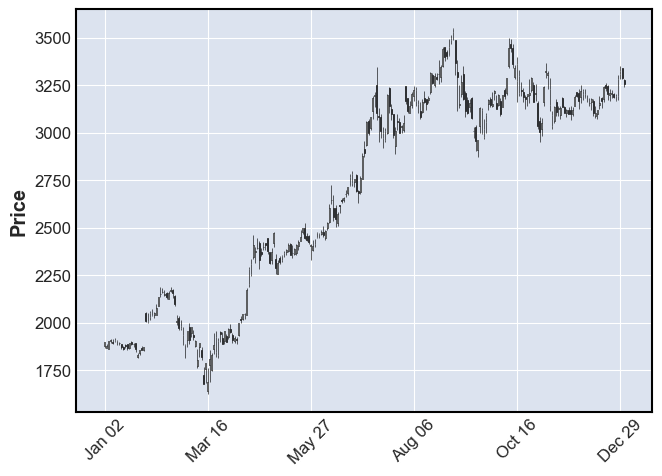

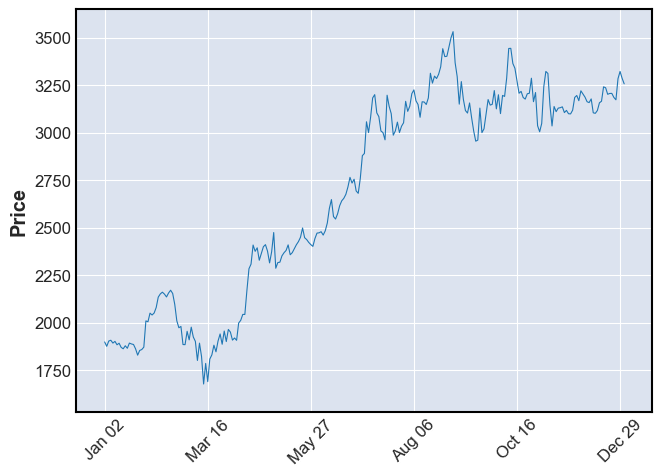

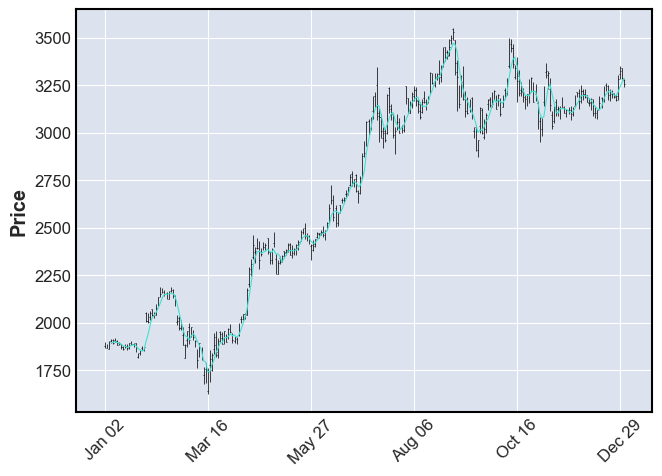

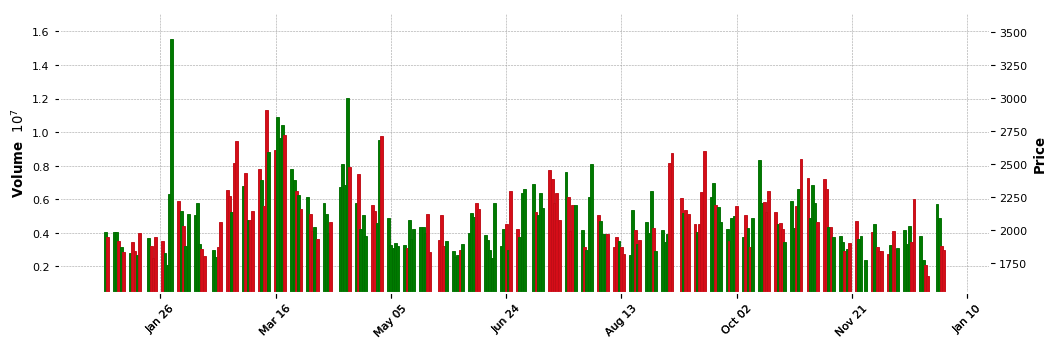

In [18]:
mplfinanace_plot("AMZN","ohlc",2020,1,1,2021,1,1)

In [19]:
#red sell Volume 3green buy volumne 

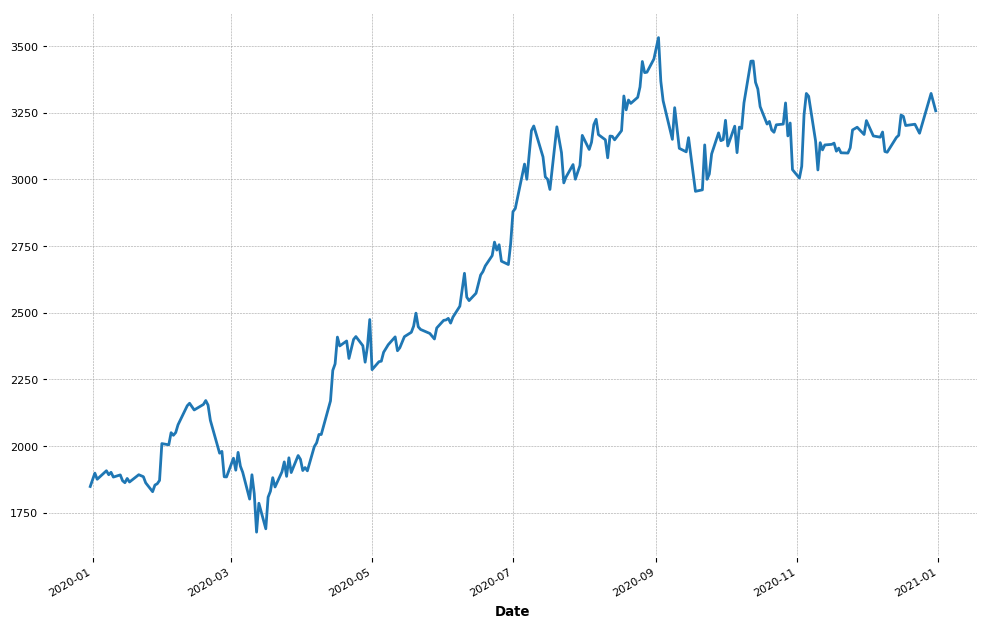

In [20]:
price_plot("AMZN",2020,1,1,2021,1,1)

In [21]:
plot_return_mult_stocks

<function __main__.plot_return_mult_stocks(investment, stock_df)>

In [22]:
tickers = ["FB","AMZN","AAPL", "NFLX", "GOOG"]
#download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

In [23]:
mul_df = marge_df_by_column_name('Adj Close',2020, 1, 1, 2021, 1, 1,*tickers)

In [24]:
mul_df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2019-12-31,205.250000,1847.839966,72.337997,323.570007,1337.020020
2020-01-02,209.779999,1898.010010,73.988472,329.809998,1367.369995
2020-01-03,208.669998,1874.969971,73.269157,325.899994,1360.660034
2020-01-06,212.600006,1902.880005,73.852989,335.829987,1394.209961
2020-01-07,213.059998,1906.859985,73.505653,330.750000,1393.339966
...,...,...,...,...,...
2020-12-24,267.399994,3172.689941,131.161423,513.969971,1738.849976
2020-12-28,277.000000,3283.959961,135.852509,519.119995,1776.089966
2020-12-29,276.779999,3322.000000,134.043640,530.869995,1758.719971


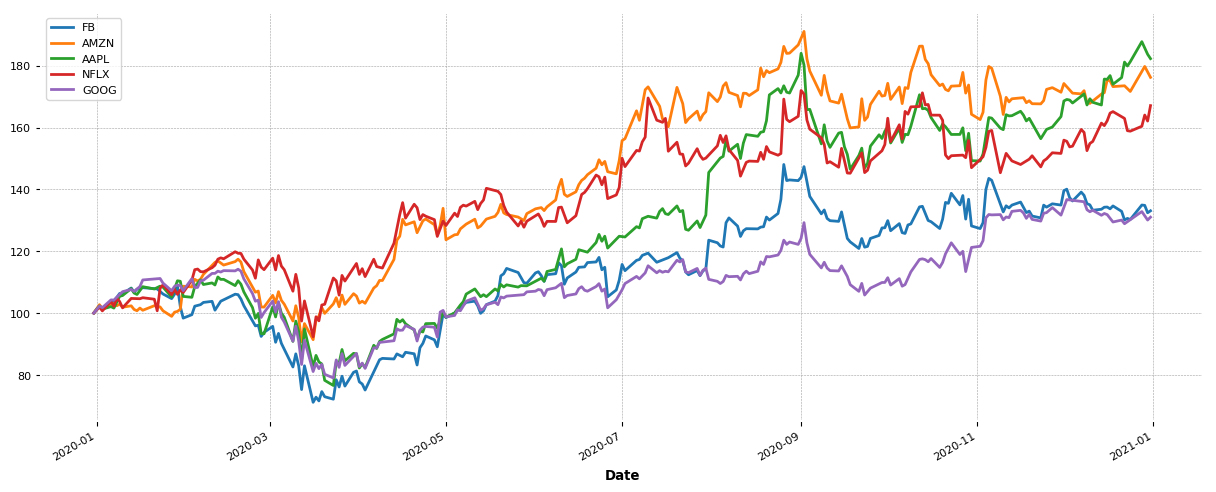

In [25]:
plot_return_mult_stocks(100,mul_df)

In [26]:
get_mult_stock_mean_sd(mul_df)
mul_df #less risky stock is googel, because it has lower Coefficient of Variation

Stock: FB   Mean:  234.44 Standard deviation: 38.53
Coefficient of Variation: 0.16436648316970504

Stock: AMZN Mean: 2677.58 Standard deviation: 547.18
Coefficient of Variation: 0.20435781754184854

Stock: AAPL Mean:   94.37 Standard deviation: 21.82
Coefficient of Variation: 0.23121430098083479

Stock: NFLX Mean:  446.34 Standard deviation: 65.94
Coefficient of Variation: 0.1477296771946909

Stock: GOOG Mean: 1480.84 Standard deviation: 175.85
Coefficient of Variation: 0.11875274192672475



,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2019-12-31,205.250000,1847.839966,72.337997,323.570007,1337.020020
2020-01-02,209.779999,1898.010010,73.988472,329.809998,1367.369995
2020-01-03,208.669998,1874.969971,73.269157,325.899994,1360.660034
2020-01-06,212.600006,1902.880005,73.852989,335.829987,1394.209961
2020-01-07,213.059998,1906.859985,73.505653,330.750000,1393.339966
...,...,...,...,...,...
2020-12-24,267.399994,3172.689941,131.161423,513.969971,1738.849976
2020-12-28,277.000000,3283.959961,135.852509,519.119995,1776.089966
2020-12-29,276.779999,3322.000000,134.043640,530.869995,1758.719971
